In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [8]:
data_folder = 'data'
file_name = 'unit_409_time_salin_temp_press_20211227.csv'
data_file = pd.read_csv(os.path.join('..', data_folder, file_name), header=None
                        )

In [9]:
data_file.columns=['timestamp', 'derived_salinity', 'm_water_temp', 'm_water_pressure']
data_file.head()

,timestamp,derived_salinity,m_water_temp,m_water_pressure
0,1513348006979,33.907894,18.820299,0.011
1,1513348017091,33.909938,18.817400,0.011
2,1513348027165,33.908950,18.818600,0.012
3,1513348037275,33.909115,18.818199,0.011
4,1513348047421,33.909955,18.818600,0.012


In [12]:
data_file['time'] = data_file.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x*0.001))
data_file.head()

,timestamp,derived_salinity,m_water_temp,m_water_pressure,time
0,1513348006979,33.907894,18.820299,0.011,2017-12-15 14:26:46.979
1,1513348017091,33.909938,18.817400,0.011,2017-12-15 14:26:57.091
2,1513348027165,33.908950,18.818600,0.012,2017-12-15 14:27:07.165
3,1513348037275,33.909115,18.818199,0.011,2017-12-15 14:27:17.275
4,1513348047421,33.909955,18.818600,0.012,2017-12-15 14:27:27.421


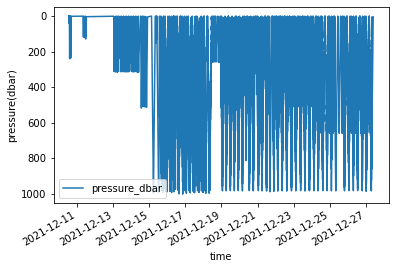

In [22]:
data_file_2021 = data_file[data_file.time>='2021-01-01'].copy()
data_file_2021['pressure_dbar'] =  data_file_2021.m_water_pressure * 10
data_file_2021.plot(x='time', y='pressure_dbar', ylabel='pressure(dbar)')
plt.gca().invert_yaxis()
plt.show()

In [25]:
max_time = data_file_2021.time.max()
print([max_time, max_time + datetime.timedelta(days=-1)])

[Timestamp('2021-12-27 09:59:01.081000'), Timestamp('2021-12-26 09:59:01.081000')]


<AxesSubplot:xlabel='pressure_dbar', ylabel='derived_salinity'>

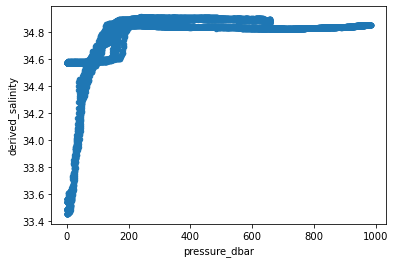

In [28]:
data_file_2021[data_file_2021.time>=(max_time+datetime.timedelta(days=-1))].plot.scatter(x='pressure_dbar',
                                                                                y='derived_salinity')

<AxesSubplot:xlabel='time', ylabel='m_water_temp'>

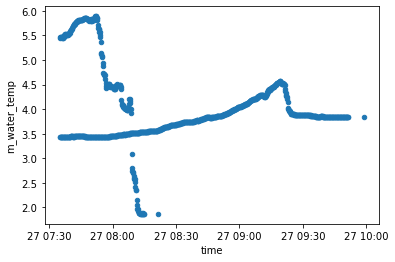

In [34]:
data_file_2021[data_file_2021.time>=(max_time+datetime.timedelta(days=-0.1))].sort_values('time').plot.scatter(x='time',
                                                                                y='m_water_temp')

In [36]:
data_glider1 = data_file_2021.iloc[::2].copy()
data_glider2 = data_file_2021.iloc[1::2].copy()

<AxesSubplot:xlabel='time', ylabel='m_water_temp'>

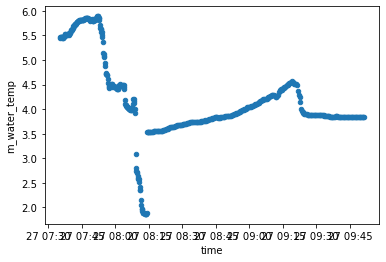

In [40]:
data_glider2[data_glider2.time>=(max_time+datetime.timedelta(days=-0.1))].sort_values('time').plot.scatter(x='time',
                                                                                y='m_water_temp')

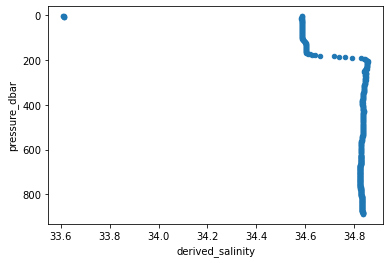

In [45]:
data_glider1[data_glider1.time>=(max_time+datetime.timedelta(days=-.1))].plot.scatter(y='pressure_dbar',
                                                                                x='derived_salinity')
plt.gca().invert_yaxis()